In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from env import get_db

In [2]:
url = get_db('telco_churn')
sql = """
SELECT * 
FROM customers
JOIN contract_types USING (contract_type_id)
JOIN payment_types USING (payment_type_id)
JOIN internet_service_types USING (internet_service_type_id);
"""

In [3]:
df = pd.read_sql(sql, url)

In [4]:
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
1,1,4,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,Credit card (automatic),DSL
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,Electronic check,DSL
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,Electronic check,DSL
4,1,3,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,Bank transfer (automatic),DSL


In [ ]:
df.info()

Zero nulls
Total charges is an object needs to be float
Impute empty string in total charges by doing monthly * tenure

In [10]:
df.total_charges = df.total_charges.replace(" ", df.tenure*df.monthly_charges)
df.total_charges = df.total_charges.astype(float)

In [11]:
train, test = train_test_split(df, random_state = 123, train_size=.8)
train, validate = train_test_split(train, random_state=123, train_size=.75)

In [ ]:
train.shape, test.shape, validate.shape

In [16]:
train['is_churn'] = (train.churn == "Yes")

In [17]:
train.is_churn.mean()

0.2672189349112426

In [ ]:
train.groupby(train.contract_type).mean()

In [ ]:
def groupby_churn():
    for c in train.columns:
        print(train.groupby(train[c]).mean())

In [ ]:
def groupby_churn(train):
    for c in train.columns:
        if len(train.groupby(train[c])) < 5:
            print(train.groupby(train[c]).is_churn.mean())
            print()

In [ ]:
groupby_churn(train)

In [ ]:
x = train.tenure
y = train.groupby(train.tenure).is_churn.sum()
y1 = train[train.contract_type == 'Month-to-month'].groupby(train.tenure).is_churn.sum()
y2 = train[train.contract_type == 'One year'].groupby(train.tenure).is_churn.sum()
y3 = train[train.contract_type == 'Two year'].groupby(train.tenure).is_churn.sum()

plt.figure(figsize=(16,6))
plt.legend
sns.lineplot(x, y, data=train, ci=None)
sns.lineplot(x, y1, data=train, ci=None)
sns.lineplot(x, y2, data=train, ci=None)
sns.lineplot(x, y3, data=train, ci=None)

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot('tenure', 'is_churn', hue='contract_type', data=train, ci=None)

In [ ]:
train[train.tenure == 10].is_churn.sum()

In [ ]:
train.tenure.value_counts()

In [ ]:
train.groupby("tenure").is_churn.value_counts().sort_values(ascending=False).head(20)


In [ ]:
train.is_churn.sum()

In [ ]:
train[train.tenure == 2].is_churn.sum()

In [ ]:
f = plt.figure(figsize=(25,20))
for i in range(0,20):
    if len(train.groupby(train.iloc[:,i])) < 5:
        f.add_subplot(5,4, i+1)
        sns.barplot(data=train, y="is_churn", x=train.iloc[:,i])
        plt.title(train.columns[i])
plt.tight_layout()
plt.show()

In [ ]:
train.head()

In [5]:
def encode_all(train):
    """encodes all Yes values to 1, No values to 0, Female to 1 and Male to 0
    then turns encode columns into integers"""
#     train = train.copy()
    train = train.replace({"Yes": 1,
                          "No": 0,
                           "No internet service": 2,
                           "No phone service": 2
    })
    for c in train.columns:
        if train.dependents.value_counts().index == ['No', 'Yes']:
            train[c] = train[c].astype(int)
    train = train.replace({"Female": 1,
                           "Male": 0  
    })
    return train

In [8]:
train = encode_all(train)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


In [9]:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 24 columns):
internet_service_type_id    4225 non-null int64
payment_type_id             4225 non-null int64
contract_type_id            4225 non-null int64
customer_id                 4225 non-null object
gender                      4225 non-null int64
senior_citizen              4225 non-null int64
partner                     4225 non-null int64
dependents                  4225 non-null int64
tenure                      4225 non-null int64
phone_service               4225 non-null int64
multiple_lines              4225 non-null int64
online_security             4225 non-null int64
online_backup               4225 non-null int64
device_protection           4225 non-null int64
tech_support                4225 non-null int64
streaming_tv                4225 non-null int64
streaming_movies            4225 non-null int64
paperless_billing           4225 non-null int64
monthly_charges           

In [ ]:
train.senior_citizen.astype(int)

In [ ]:
train.tenure.max()

In [ ]:
contract = train.contract_type == "Month-to-month"
tenure = train.tenure <= 12
train[tenure & contract].is_churn.mean()

$churn\_rate = \frac{(n\_users_0 - n\_users_n)}{n_users_0}$
$for \  _n \ months$

$Churn rate = \frac{(n\ users\ at\ beginning\ of\ period\ - n\ users\ at\ end\ period)}{users\ at\ beggining\ period}$

In [ ]:
train[train.online_security == 2].internet_service_type.value_counts()

In [12]:
# We had two options to deal with categorical data that had a n/a result (no phone service or no internet service), we chose to encode this as a seperate option (value=2) rather than lump in with other negative i.e. "No" values.
#  This could have implications when we are modeling because there is no value relationship between the integers used (e.g. 2 is not more than 1)


def encode_all(df):
    """encodes all Yes values to 1, No values to 0, and 2 for n/a results of no internet service
    or no phone service,  Female to 1 and Male to 0 then turns encode columns into integers"""
    df = df.replace({"Yes": 1,
                          "No": 0,
                           "No internet service": 2,
                           "No phone service": 2
    })
    df = df.replace({"Female": 1,
                           "Male": 0  
    })
    for c in df.columns:
        if c == 'monthly_charges' or c== 'total_charges':
            df[c] = df[c]
        elif df[c].any() == 1:
            df[c] = df[c].astype(int)
    return df

In [13]:
train = encode_all(train)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 24 columns):
internet_service_type_id    4225 non-null int64
payment_type_id             4225 non-null int64
contract_type_id            4225 non-null int64
customer_id                 4225 non-null object
gender                      4225 non-null object
senior_citizen              4225 non-null int64
partner                     4225 non-null object
dependents                  4225 non-null object
tenure                      4225 non-null int64
phone_service               4225 non-null object
multiple_lines              4225 non-null object
online_security             4225 non-null object
online_backup               4225 non-null object
device_protection           4225 non-null object
tech_support                4225 non-null object
streaming_tv                4225 non-null object
streaming_movies            4225 non-null object
paperless_billing           4225 non-null object
monthly_charge

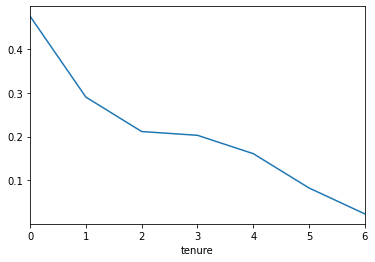

In [25]:
train.groupby(train.tenure // 12).is_churn.mean().plot()

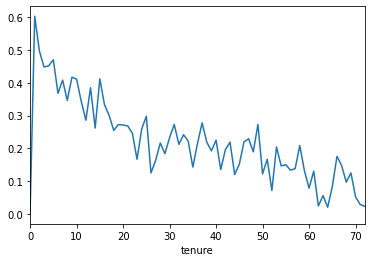

In [23]:
train.groupby(train.tenure).is_churn.mean().plot()